In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\Salary Data.csv')
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


About Dataset

This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

Columns:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

In [3]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

# Data profiling and Inspection

In [4]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


* max salary is 250000.000000.
* min salary is 350.000000.
* < 25%(Q1) salary is 55000.000000
* < 50%(Q2/median) salary is 95000.000000
* < 75%(Q3) salary is 140000.000000

In [6]:
df.describe(include=object)

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


* Total Gender are 373 in 2 category. Here, male are 194 out of 373.
* Total education level 373 in 3 category. Here, Bachelor's are 224 out of 373.
* 373 Job title in 174 category. Here, top job title is Director of Marketing.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


* The dataset has 375 entitis/rows. However each column has 373 not-null rows which means 2 rows are missing.

In [8]:
# how many missing rows in each columns?
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [9]:
# I want to visulize the missing data
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [10]:
df.isna().T # Transpose the row data in column and column into row

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
Age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gender,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Education Level,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Job Title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Years of Experience,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Salary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

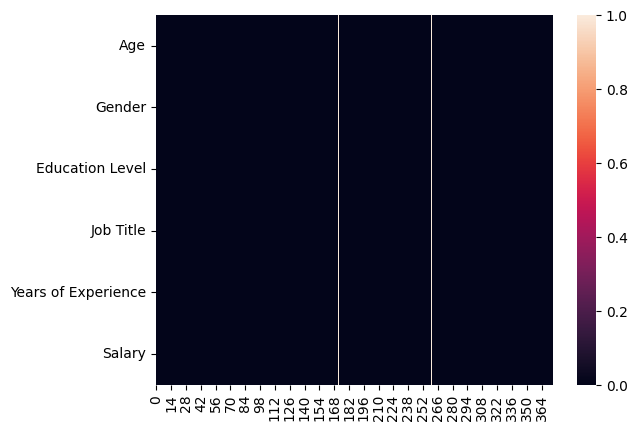

In [11]:
sns.heatmap(df.isna().T)

* The plot shows 2 entirely missing rows(which is represent in white color)

In [12]:
# how to see missing rows only in dataframe
df.loc[df.isna().any(axis = 'columns')]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


# Missing data Handling

## Deletion
* row: if target or label(y) is missing: if entire row is missing we drop the rows.

* Columns: if a column contains > 70% data missing we drop column.

## Imputation(fill in missing value).

* mean: data has no outliers and normally distribution --use mean to fill in
missing data.

* median: if data has outlier use median to fill in missing data.

* mode: if data(column) is categorical and data is missing we use mode to fill in missing data.

## Mathmatical Technique
* Interpolation : if x = 2 or y= 2 and next x = 4 or y = 4 we are difinetly assume the next x = 3 or y = 3
* Extrapolation : if we have a value  4,5,6,7 we should defenetly assume next value is 8.

## Algorithm
* MICE
* IterativeImputer
* LinearRegration
* RandomForest
* KNN

## EDA and Domain Knowledge

In our case entire row is missing so we drop the rows.

In [13]:
# Drop the missing rows -- tara esle dataframe update gardaina so we should use inplace = True
df.dropna() # drop the null value

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Text(0.5, 1.0, 'HistGram of frequency of Age')

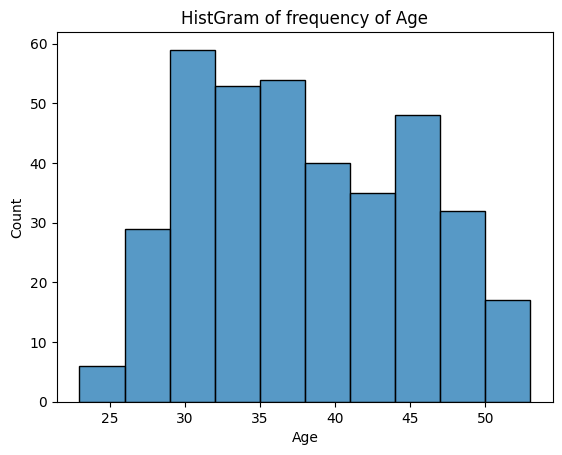

In [16]:
# plot histogram of each numerical data
sns.histplot(df['Age'])
plt.title('HistGram of frequency of Age')

In [17]:
gen_data = df['Gender'].value_counts()
gen_data

Gender
Male      194
Female    179
Name: count, dtype: int64

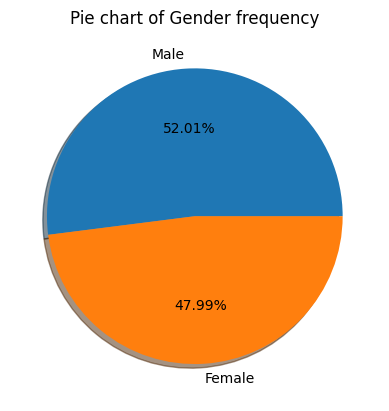

In [18]:
# plot the pie chart of the gender frequency
plt.pie(x = gen_data.values,labels= gen_data.index,autopct = '%1.2f%%',shadow = True)
plt.title('Pie chart of Gender frequency')
plt.show()

In [19]:
df.columns


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [20]:
df['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

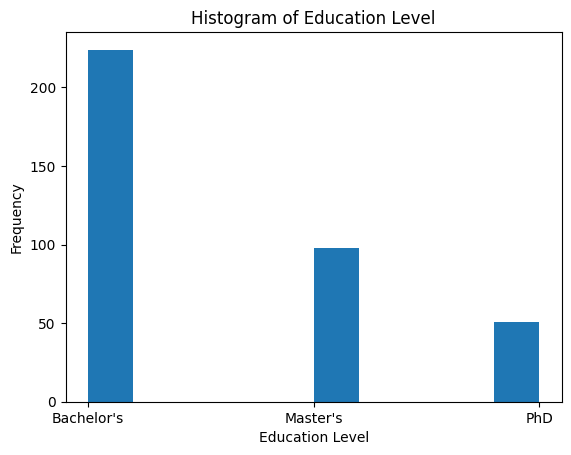

In [21]:
plt.hist(df['Education Level'])
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title("Histogram of Education Level")
plt.show()

In [22]:
# extract the each job title according to Education Level
job_df = df.groupby('Education Level')['Job Title'].unique()
job_df

Education Level
Bachelor's    [Software Engineer, Sales Associate, Marketing...
Master's      [Data Analyst, Director, Product Manager, Soft...
PhD           [Senior Manager, Senior Scientist, Senior Engi...
Name: Job Title, dtype: object

# Identifying dependent and independent variable

Dependent vairable(y): Salary

Independent variable(x): Age, Gender, Years of Exprience, Job Title, Education Level

To predict Salary we might not always need every Independent variable. We can select few features based on some feature selection technique. Since it is a regression problem(y or salary is continuous data) y should always be correlated with x. We can use Heatmap to visulize correlation and select the features.

# Features selection

In [23]:
df.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


<Axes: >

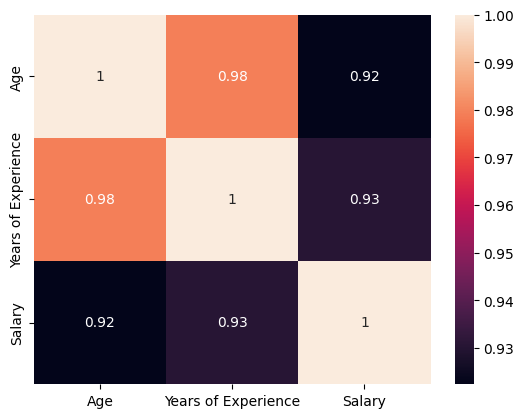

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

* The target y  or salary has positive correlation 0.92 with Age .
* The target y or salary has postive correltion 0.93 with Years of Exprience.

Therefore, Age and Years of Exprience is good predictor variable of Salary. However, Age and Years of Exprience themselves are also correlated with correlation value 0.98. Which means two independent variable are correlated. It is a problem of multi-colinarity.

Here, one independent variable predicts other i.e Age can predict Years of exprience and vice verse. Therefore, it makes no sense to include both of them as independent variable to predict salary. Hence, We drop one column.

We want to drop one either Age or Years of Exprience column but which one?

* Reasion 1: Years of exprience is more correlated with Salary than Age.
* Reasion 2: Years of exprience is easily available in inference time i.e you can just ask a candidate their years of exprience but you cannot ask their age with ease.

In [25]:
X = df[['Years of Experience']] # Independent  variable
y = df.Salary # Dependent variable

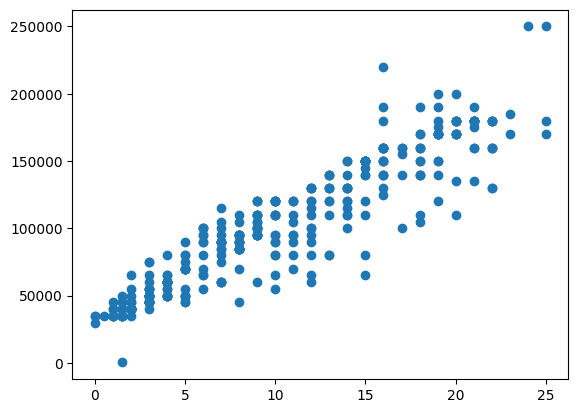

In [26]:
plt.scatter(x=X,y=y)

# Train test split

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg">

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42) # test_size = 0.2 means 20% test data


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Prediction

In [29]:
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_true=y_test, y_pred = y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred = y_pred)
r2 = r2_score(y_true=y_test, y_pred = y_pred)
print("MAE = ",mse)
print("MSE = ",mae)
print("R2_score = ",r2) # r2 score le accuracy of LinearRegression dinxa


MAE =  241834883.8999349
MSE =  12094.170341194764
R2_score =  0.8991338517367767


In [31]:
m = model.coef_ # slop
c = model.intercept_ 
print("Slop = ",m)
print("Intercept = ",c)

Slop =  [6822.59017499]
Intercept =  31521.077620206008


# Visulization

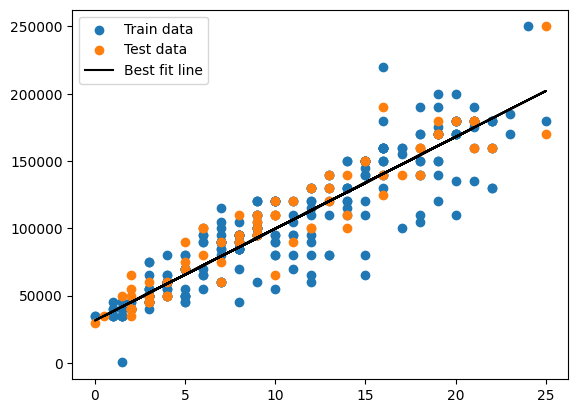

In [32]:
plt.scatter(X_train,y_train,label="Train data")
plt.scatter(X_test,y_test,label="Test data")
plt.plot(X_test,y_pred,label = 'Best fit line',color="black")
plt.legend()
plt.show()
